# Interactive Data Exploration with SPRING

<table style="width:100%">
  <tr>
    <th>Gene_Exploration</th>
    <th>Cluster_Visualization</th> 
    <th>Pseudotime</th>
  </tr>
  <tr>
    <td><img src="Krumsiek_Gene.png", height="420" width="680"> </td>
    <td><img src="Krumiek_Clusters.png" , height="420" width="680"> </td>
    <td><img src="Krumsiek_Pseudotime.png", height="420" width="680" > </td>
  </tr>
</table>



This notebook shows how to interactively explore data in SPRING and explores results of the Krumsiek and the Seurat data sets. SPRING is an interactive, browser-based visualization tool designed for single-cell RNA-analysis that uses force directed methods to visualize high-dimensional data in 3D. 

The Scanpy SPRING export function supports tracking of differential gene expression for genes - especially marker genes, categorical colorings for e.g. clustering of the data and individual color tracks for e.g. visualization and exploration of Diffusion Pseudotime results. 





## SPRING setup & Prerequesites

We use the tool programmed by the Allon-Klein Lab that can be found here:

https://github.com/AllonKleinLab/SPRING

Clone the repository to your preferred destination folder. It is recommendable that the folder is easily accessible. 

Make sure that http.server (Python 3) is installed (SimpleHTTPServer is outdated and Scanpy requires version 3.5 or higher anyway). If not, install by e.g.:

    pip install http.server   



## Using the export function in Scanpy

The SPRING Tool requires a number of CSV and JSON files to be written in a folder structure. The basic export is done by calling 

    save_spring_dir(adata,project_directory,k=30, D=None, custom_color_tracks=None, cell_groupings=None)
    
    
after calling: 

    from scanpy.exporting import save_spring_dir


__adata__ is an AnnData object

__project_directory__ (str) defines the destination folder of the written files (relative to the current postion of the program calling the function)

__k__ (int) defines the k for which a k-nearest-neighbour graph will be built that is used to visualize data. k=30 is used as default and produces reasonable output. For k too low, data will not cluster properly

__custom_color_tracks__ and __cell_groupings__ are optional parameters that contain either a string or a list of strings that are used to access adata annotation for the custom color_tracks or, respectively, categorical coloring. 

__use_genes__ is an optional parameter that can contain either a list of genes used for coloring (in which case gene names should be in adata.var_names) or 'rank_genes_groups_gene_names' to include significant genes as ranked by rank_gene_groups only. If no parameter is passed, all genes are used. This may slow down writing a bit (on (preprocessed) PBMC dataset with 2638 cells, ~13.000 genes takes approx. 4 minutes using a normal SSD). 

## Calling SPRING and exploring the results

After writing all necessary files using 

    save_spring_dir()
    
call (in bash or comparable) 
    
    python3 -m http.server 8000 &

This opens a local virtual server that is necessary for SPRING to work. Now, in a browser, open 

    http://localhost:8000/<Path_To_SPRING>/springViewer.html?<RelativePath_To_ProjectDirectory>

so e.g.:

    http://localhost:8000/SPRING/springViewer.html?../scanpy/krumsiek

The first path is the one relative to the 'server postion', i.e. relative to the folder in which the http.server was opened. 

The second path is relative to the SPRING directory. Therefore, storing project_directory close to or in SPRING simplifies matters. 

Now the simulation should start. For large datasets it may need a few minutes until all genes are loaded and the simulation has reached an equilibrium. 

For an explanation of SPRING, see 

https://github.com/AllonKleinLab/SPRING

or see the HELP! Page in SPRING.

## Example Case: Krumsiek Data set


In [1]:
from scanpy.exporting import save_spring_dir
import scanpy.api as sc
import numpy as np
sc.settings.verbosity = 3                # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)    # dots (pixels) per inch determine size of inline figures

In [2]:
adata_krumsiek11 = sc.datasets.krumsiek11()

--> you can reproduce the data file /home/tobias/miniconda3/lib/python3.6/site-packages/scanpy/datasets/krumsiek11.txt by running `sc.tl.sim("krumsiek11")`
reading cache ./write/data/home/tobias/miniconda3/lib/python3.6/site-packages/scanpy/datasets/krumsiek11.h5


In [3]:
# In orer to add color-tracks and group coloring, calculate louvain clustering, pseudotime. 
# Note that louvain method is only included for demonstration reasons
sc.tl.louvain(adata_krumsiek11, n_neighbors=10, resolution=1.3, recompute_graph=True)
adata_krumsiek11.uns['iroot'] = 0
sc.tl.dpt(adata_krumsiek11, n_branchings=2, n_neighbors=5, knn=False)

running Louvain clustering
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 10 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9997081757  0.9995225072  0.9988661408  0.9987463355
      0.9967362285  0.9950016141  0.9936144352  0.9919355512  0.9894726872
      0.9880274534  0.9844530225  0.980974257   0.979559958   0.9742478132]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.330): found 20 clusters and added
    'louvain_groups', the cluster labels (adata.smp, dtype=category)
perform Diffusion Pseudotime analysis
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 5 
    computing spectral decomposition ("diffmap") with 10 components
    eigenvalues of transition matrix
    [ 1.            0.9999370575  0.9999125004  0.9998248816  0.9997677207
      0.9993129373  0.9989748001  

The draw_graph function in scanpy uses the same algorithm as SPRING. Results are comparable, but Python visualization is not interactive.

drawing single-cell graph using layout "fr"
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            0.998418808   0.9969582558  0.9920811653  0.9909049273
      0.9824624062  0.9651805162  0.9614249468  0.9520583153  0.9385528564
      0.9172899127  0.9089726806  0.8958978653  0.8761963248  0.8536654115]
    finished (0:00:03.407) and added
    "X_draw_graph_fr", graph_drawing coordinates (adata.smp)
    "draw_graph_params", the parameters (adata.uns)


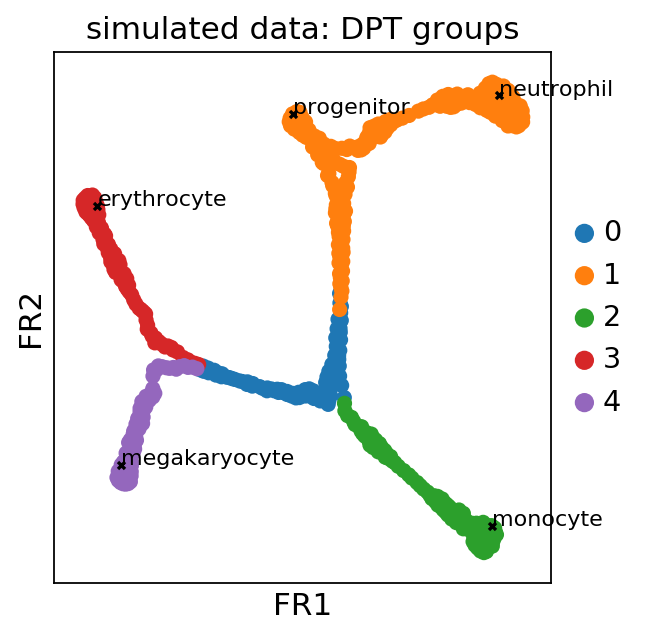

In [5]:
# Before exploring data interactively, compare with draw_graph function in python:
sc.tl.draw_graph(adata_krumsiek11)
ax = sc.pl.draw_graph(adata_krumsiek11, color='dpt_groups', title='simulated data: DPT groups')

In [8]:
# Now, write Data 
save_spring_dir(adata_krumsiek11,'./Documents/scanpy/krumsiek', cell_groupings=['dpt_groups','louvain_groups'], 
                custom_color_tracks='dpt_pseudotime')

    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.998418808   0.9969582558  0.9920811653  0.9909049273
      0.9824624062  0.9651805162  0.9614249468  0.9520583153  0.9385528564
      0.9172899127  0.9089726806  0.8958978653  0.8761963248  0.8536654115]


Now open SPRING as described above.

## A note on including categorical data and color tracks: 

In order to include color_tracks such as for diffusion pseudotime, adata.smp[__custom_color_tracks__] needs to exist for all keys (if a list, for all list elements).

In order to include categorical data, the following annotation needs to exist for __cell_grouping__ (each element if a list): 

Group key for each cell:

    adata.smp[cell_groupings] 
    
Colors for each group key (optional):

    adata.uns[cell_groupings+'colors']
    
Scanpy creates group-specific colors the first time a plotting function using these groups is called and stores them. If the color annotation exists this is taken for SPRING. If no such annotation exists, arbitrary (distinct) colors are used. This may lead to confusion, and colors are not stored for later use. Therefore it is advisable to first call a plotting function in scanpy. In the above example, colors for dpt_groups will always be consistent with those displayed above, while coloring for louvain_groups is arbitrary.

## Further function calls: Seurat PBMC Data set 

### Selecting genes

It is recommended that - especially for large datasets - only a preselected number of genes of interest is used for SPRING, so that these genes can be found more easily (in the dataset below, searching for a certain gene in a dropdown list of ca. 13000 entries can be hard ). 

In [9]:
# Read the stored and already annotated data
import scanpy.api as sc
from scanpy.exporting import save_spring_dir
adata_corrected = sc.read('pbmc3k_corrected')
adata_raw = sc.read('pbmc3k_filtered_raw_log')

drawing single-cell graph using layout "fr"
    compute "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9966328144  0.9890032411  0.9713063836  0.9642323256
      0.9410279989  0.935233593   0.9082178473  0.899068892   0.8915072083
      0.8814259171  0.8310211897  0.8266228437  0.8187436461  0.8073325157]
    finished (0:00:53.439) and added
    "X_draw_graph_fr", graph_drawing coordinates (adata.smp)
    "draw_graph_params", the parameters (adata.uns)


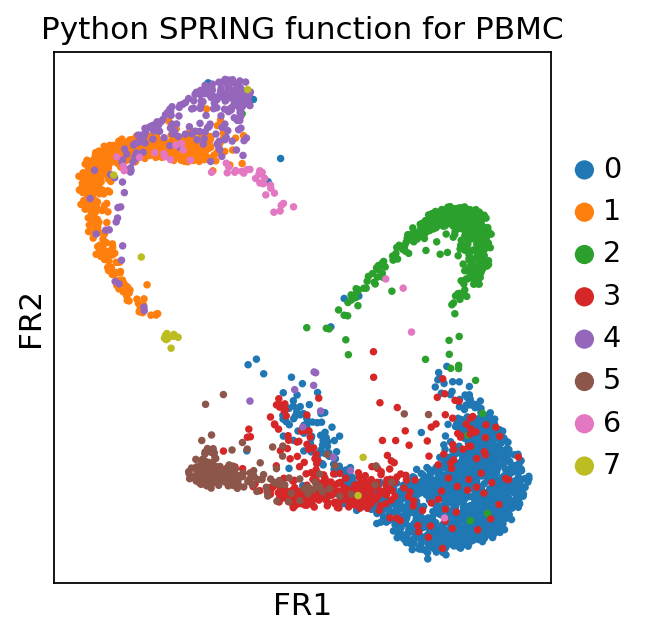

In [10]:
# We draw a graph first in Python to get consistent and nicer  colors 
sc.tl.draw_graph(adata_raw)
ax = sc.pl.draw_graph(adata_raw, color='louvain_groups', title='Python SPRING function for PBMC')

find differentially expressed genes
... consider 'louvain_groups': ['0' '1' '2' '3' '4' '5' '6' '7'] with sample numbers [1110  417  340  328  219  166   42   16]
    finished (0:00:00.417) and added
    "rank_genes_groups_gene_names", np.recarray to be indexed by the `groups` (adata.uns)
    "rank_genes_groups_gene_zscores", the scores (adata.uns)
    "rank_genes_...", distributions of top-ranked genes (adata.smp)


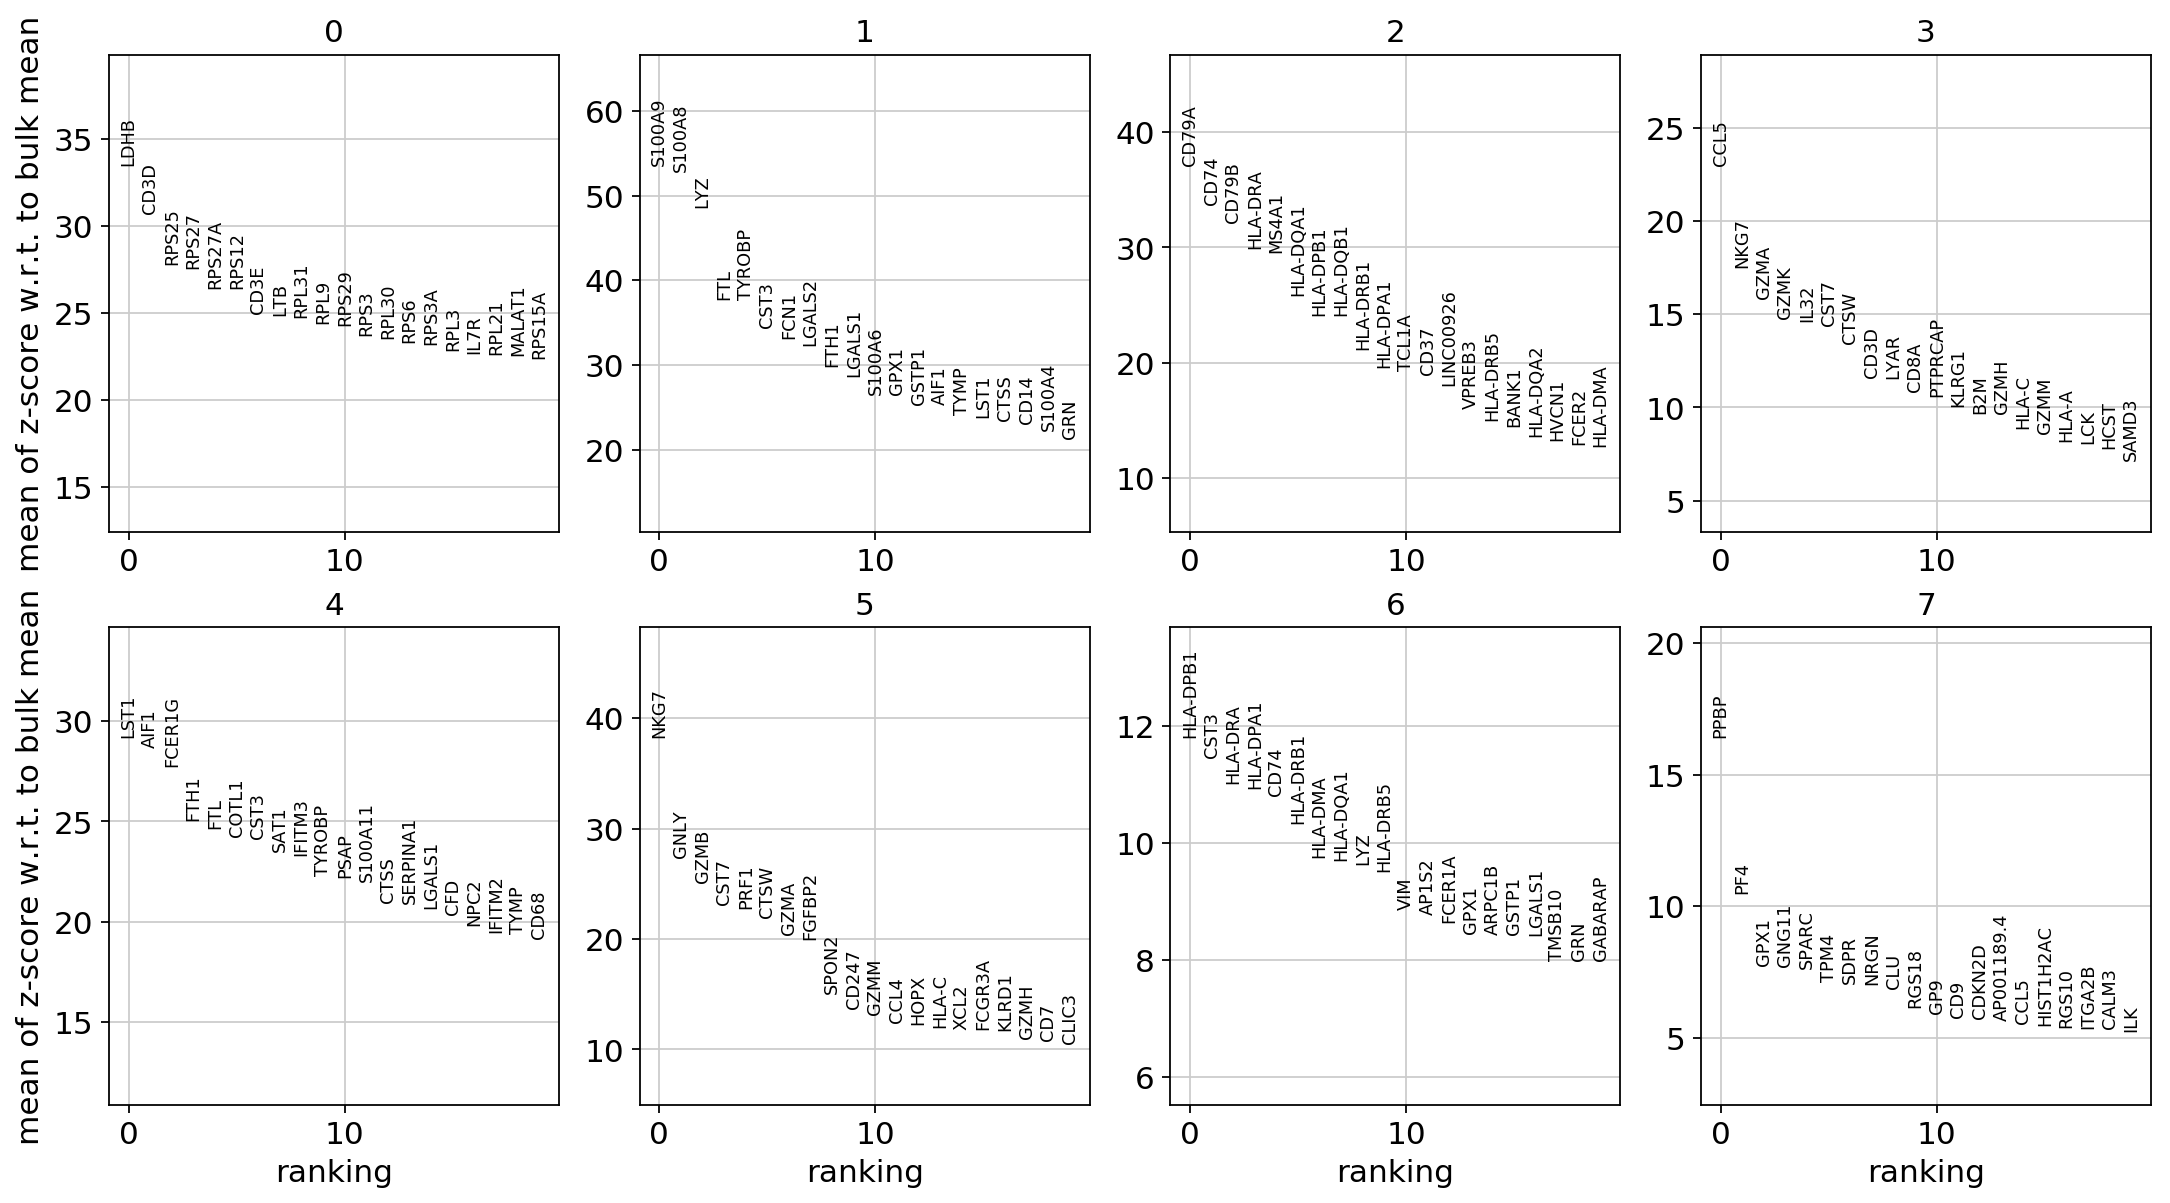

In [11]:
# Rank genes in order to include only significant ones. 
# Note that the ranking function by default ranks 100, not 20 as displayed below. 
sc.tl.rank_genes_groups(adata_raw, 'louvain_groups')
sc.pl.rank_genes_groups(adata_raw, n_genes=20)

In [12]:
save_spring_dir(adata_raw,'./Documents/scanpy/pbmc_ranked_genes', 
                cell_groupings='louvain_groups', use_genes='rank_genes_groups_gene_names')

    compute "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9966328144  0.9890032411  0.9713063836  0.9642323256
      0.9410279989  0.935233593   0.9082178473  0.899068892   0.8915072083
      0.8814259171  0.8310211897  0.8266228437  0.8187436461  0.8073325157]


In [13]:
known_marker_genes=['IL7R','CD14','LYZ', 'MS4A1', 'CD8A', 'FCGR3A', 'MS4A7', 'GNLY', 'NKG7', 'FCER1A', 'CST3', 'PPBP']
save_spring_dir(adata_raw,'./Documents/scanpy/pbmc_known_markers', 
                cell_groupings='louvain_groups', use_genes=known_marker_genes)

    compute "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9966328144  0.9890032411  0.9713063836  0.9642323256
      0.9410279989  0.935233593   0.9082178473  0.899068892   0.8915072083
      0.8814259171  0.8310211897  0.8266228437  0.8187436461  0.8073325157]


In [14]:
# Minimum function call: Adata object, project directory 
save_spring_dir(adata_raw,'./Documents/scanpy/pbmc_all')

    compute "X_pca" for building graph
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9966328144  0.9890032411  0.9713063836  0.9642323256
      0.9410279989  0.935233593   0.9082178473  0.899068892   0.8915072083
      0.8814259171  0.8310211897  0.8266228437  0.8187436461  0.8073325157]
